House_Price_Predictor_PRO using Multi-linear Regression and Ridge-Lasso Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
model=LinearRegression()

In [5]:
df=pd.read_csv('house_price_dataset_PRO.csv')

<Axes: >

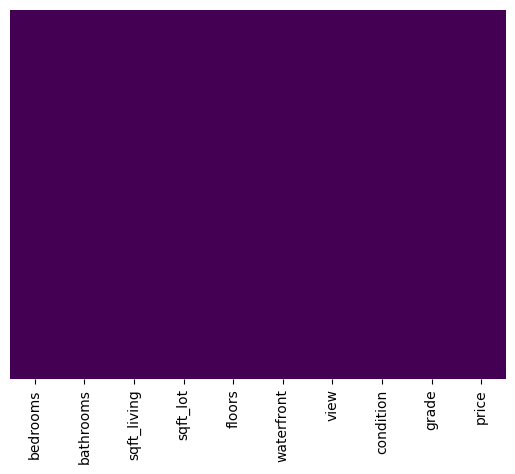

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,price
0,4,2,2193,4584,1,0,1,4,4,915580
1,5,2,2182,9053,1,0,4,5,4,133186
2,3,2,619,4330,2,1,0,2,2,994249
3,5,3,1330,3703,3,1,0,3,4,737250
4,5,3,4175,9662,1,0,2,5,11,201094


In [9]:
X=df.drop('price',axis=1)
y=df['price']

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [16]:
# Transform Data
from sklearn.preprocessing import StandardScaler

In [23]:
scaler1=StandardScaler()
scaler2=StandardScaler()

In [33]:
X_train_scaled=scaler1.fit_transform(X_train)

In [35]:
y_train_scaled=scaler2.fit_transform(np.array(y_train).reshape(-1,1))

In [34]:
X_test_scaled=scaler1.transform(X_test)

In [36]:
model.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [37]:
y_pred=model.predict(X_test_scaled)

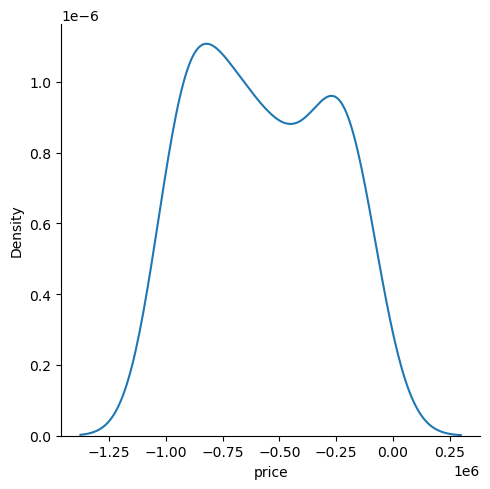

In [43]:
sns.displot(np.array(y_pred).reshape(-1)-y_test,kind='kde')

Using Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [48]:
ridge=Ridge()

In [50]:
parameters={'alpha':[1,2,3,4,5]}

In [51]:
ridgeCV=GridSearchCV(ridge,parameters,cv=5,scoring='neg_mean_squared_error')

In [53]:
ridgeCV.fit(X_train_scaled,y_train_scaled)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [54]:
print(ridgeCV.best_params_)

{'alpha': 5}


In [55]:
print(ridgeCV.best_score_)

-1.109371752461119


In [56]:
y_pred=ridgeCV.predict(X_test_scaled)

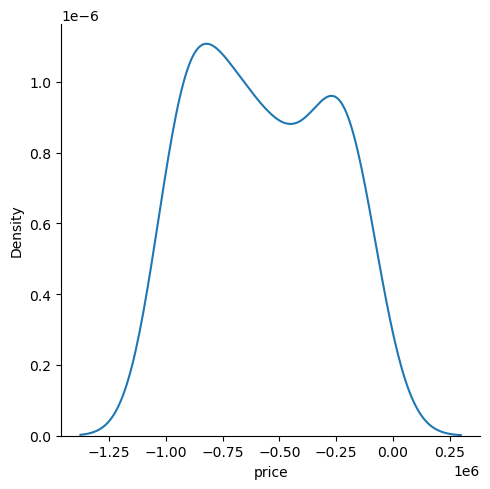

In [57]:
sns.displot(y_pred-y_test,kind='kde')

Using Lasso Regression


In [59]:
from sklearn.linear_model import Lasso

In [60]:
lasso=Lasso()

In [61]:
lassoCV=GridSearchCV(lasso,parameters,cv=5,scoring='neg_mean_squared_error')

In [62]:
lassoCV.fit(X_train_scaled,y_train_scaled)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [63]:
print(lassoCV.best_params_)

{'alpha': 1}


In [64]:
print(lassoCV.best_score_)

-1.0088393718035547


In [65]:
y_pred_lasso=lassoCV.predict(X_test_scaled)

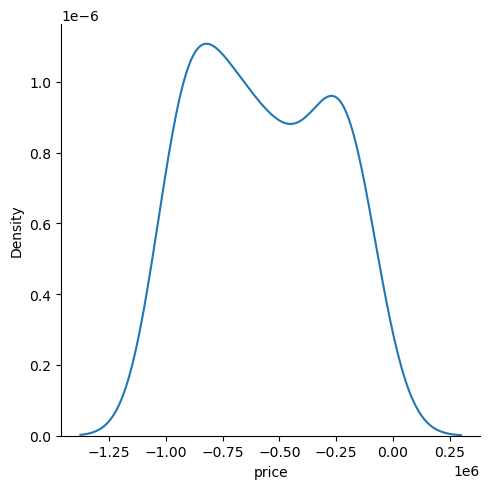

In [66]:
sns.displot(y_pred_lasso-y_test,kind='kde')